In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Path to the CSV file
csv_path = "logs/Swiss_Roll_2025-08-15_15-14-09/prdc_all_regs_steps.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

,reg,step,precision,recall,density,coverage
0,0.0,1001,0.7119 ± 0.0292,0.9986 ± 0.0006,0.5837 ± 0.0413,0.8418 ± 0.0209
1,0.0,2001,0.9165 ± 0.0205,0.9974 ± 0.0007,0.8630 ± 0.0320,0.9268 ± 0.0129
2,0.0,3001,0.9494 ± 0.0051,0.9946 ± 0.0045,0.9057 ± 0.0144,0.9463 ± 0.0165
3,0.0,4001,0.9559 ± 0.0015,0.9972 ± 0.0019,0.9152 ± 0.0074,0.9533 ± 0.0054
4,0.0,5001,0.9622 ± 0.0086,0.9975 ± 0.0005,0.9327 ± 0.0136,0.9518 ± 0.0066


In [13]:
# Specify the step and regs you want to show
step_value = 39001

regs_to_show = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]  # list the reg values you want
# regs_to_show = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

summary = df[df['step'] == step_value]
summary = summary[summary['reg'].isin(regs_to_show)]
summary = summary.drop(columns=['step']).reset_index(drop=True)

# Split ± columns into mean and std
for col in ['precision', 'recall', 'density', 'coverage']:
    summary[[f'{col}_mean', f'{col}_std']] = summary[col].str.split(' ± ', expand=True)
    summary[f'{col}_mean'] = summary[f'{col}_mean'].astype(float)
    summary[f'{col}_std'] = summary[f'{col}_std'].astype(float)

# Keep reg + mean columns for coloring
highlight_cols = ['precision_mean', 'recall_mean', 'density_mean', 'coverage_mean']
display_cols = ['reg'] + highlight_cols

# Display with gradient on mean values
summary[display_cols].style.background_gradient(subset=highlight_cols, cmap='Greys')


,reg,precision_mean,recall_mean,density_mean,coverage_mean
0,0.000000,0.985000,0.994900,0.976500,0.964300
1,0.050000,0.989700,0.994400,0.988600,0.962500
2,0.100000,0.988300,0.992900,0.987200,0.963200
3,0.150000,0.984300,0.991700,0.980700,0.962000
4,0.200000,0.993000,0.985200,1.005600,0.944500
5,0.250000,0.987900,0.988500,0.984900,0.952900
6,0.300000,0.989400,0.984600,0.992100,0.929200
7,0.350000,0.988800,0.981500,0.988500,0.925100
8,0.400000,0.992000,0.981900,0.999900,0.942700
9,0.450000,0.988000,0.986100,0.994600,0.958600


In [35]:
regs_to_plot = [0, 0.3]  # change as needed

# Filter dataframe for selected regs
plot_df = df[df['reg'].isin(regs_to_plot)].copy()

metrics = ['precision', 'recall', 'density', 'coverage']


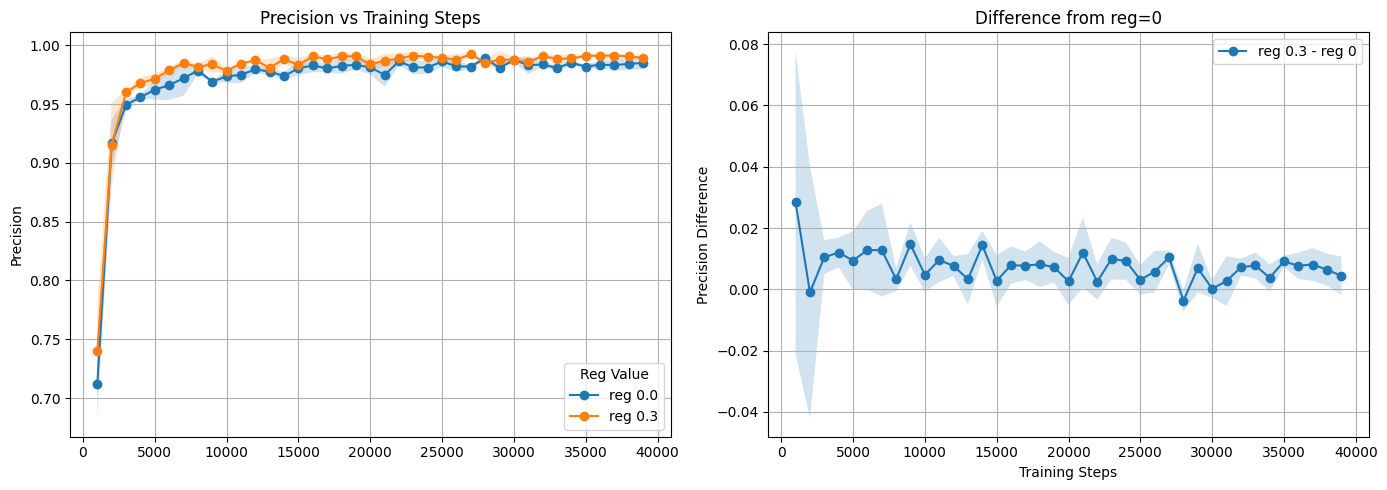

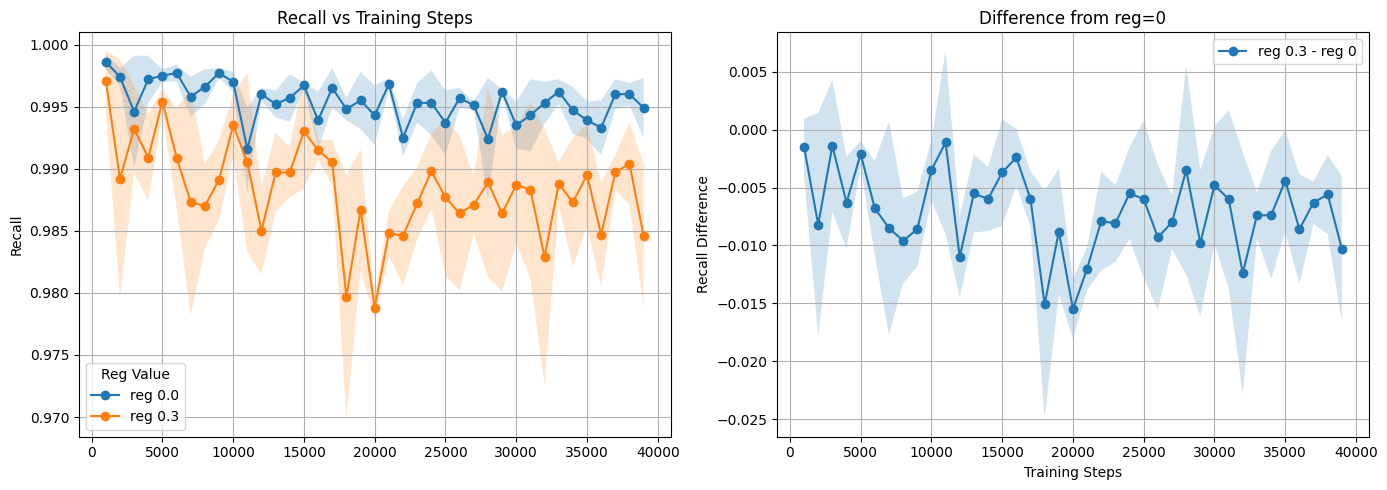

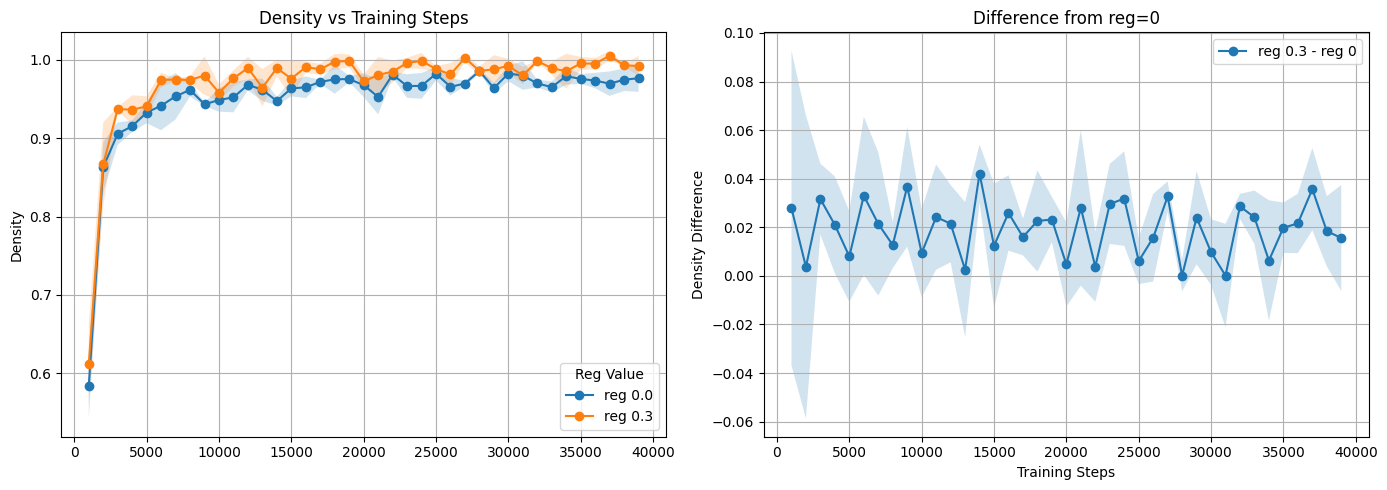

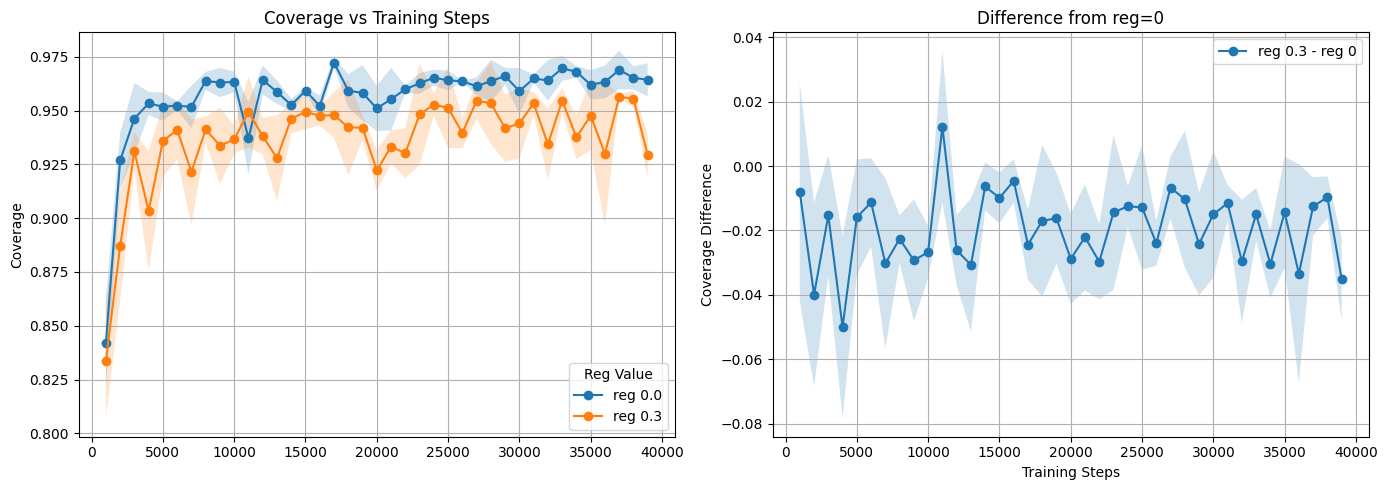

In [36]:
# Split ± std into numeric columns for all metrics
for metric in metrics:
    plot_df[[f'{metric}_mean', f'{metric}_std']] = plot_df[metric].str.split(' ± ', expand=True)
    plot_df[f'{metric}_mean'] = plot_df[f'{metric}_mean'].astype(float)
    plot_df[f'{metric}_std'] = plot_df[f'{metric}_std'].astype(float)

# Plot each metric
for metric in metrics:
    baseline = plot_df[plot_df['reg'] == 0]
    others = plot_df[plot_df['reg'] != 0]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

    # Left: original metric curves with ± std shading
    for reg_val in plot_df['reg'].unique():
        reg_data = plot_df[plot_df['reg'] == reg_val]
        axs[0].plot(reg_data['step'], reg_data[f'{metric}_mean'], marker='o', label=f'reg {reg_val}')
        axs[0].fill_between(reg_data['step'], 
                            reg_data[f'{metric}_mean'] - reg_data[f'{metric}_std'], 
                            reg_data[f'{metric}_mean'] + reg_data[f'{metric}_std'], 
                            alpha=0.2)
    axs[0].set_ylabel(metric.capitalize())
    axs[0].set_title(f'{metric.capitalize()} vs Training Steps')
    axs[0].grid(True)
    axs[0].legend(title='Reg Value')

    # Right: difference from baseline (reg=0) with ± std propagation
    for reg_val in others['reg'].unique():
        reg_data = others[others['reg'] == reg_val]
        diff = reg_data[f'{metric}_mean'].values - baseline[f'{metric}_mean'].values
        diff_std = np.sqrt(reg_data[f'{metric}_std'].values**2 + baseline[f'{metric}_std'].values**2)
        axs[1].plot(reg_data['step'], diff, marker='o', label=f'reg {reg_val} - reg 0')
        axs[1].fill_between(reg_data['step'], diff - diff_std, diff + diff_std, alpha=0.2)
    axs[1].set_xlabel('Training Steps')
    axs[1].set_ylabel(f'{metric.capitalize()} Difference')
    axs[1].set_title(f'Difference from reg=0')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
